In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [18]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
start_date = dt.date(2016,8,23)
end_date = dt.date(2017,8,23)
result = session.query(measurement.date, measurement.prcp).filter(measurement.date > start_date ).order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result, columns=['date', 'precipation'])
# Sort the dataframe by date
prcp_df.set_index('date')
prcp_df = prcp_df.dropna()
prcp_df

,date,precipation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


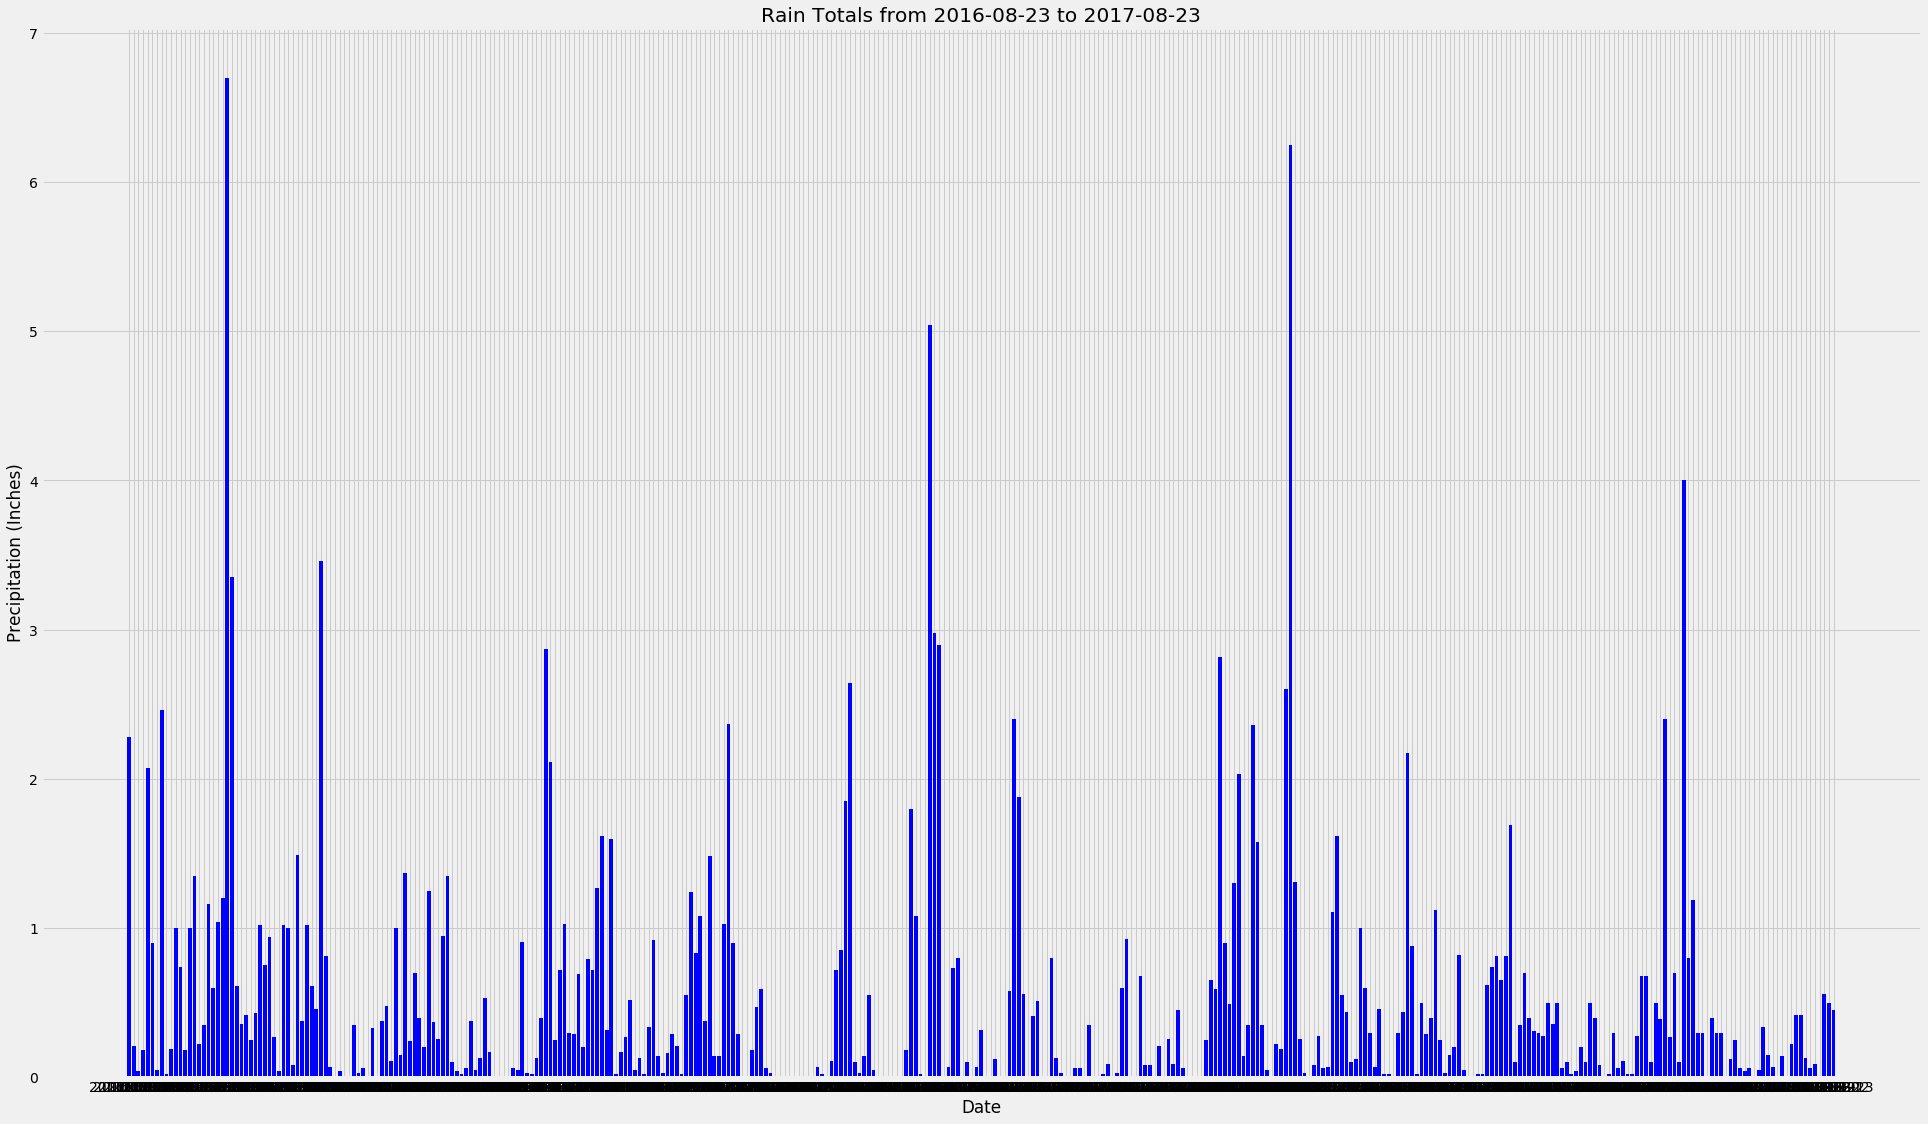

In [75]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = prcp_df.date
y_axis = prcp_df.precipation
plt.figure(figsize=(30,18))
plt.bar(x_axis, y_axis, color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title(f'Rain Totals from {start_date} to {end_date}')



plt.show()

In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [77]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.id).count()
stations

9

In [78]:
measurements_df = pd.read_sql("select * from Measurement", conn)
measurements_df.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [79]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurements_df["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [80]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp = measurements_df['tobs'].loc[measurements_df['station']== 'USC00519281'].min()
high_temp = measurements_df['tobs'].loc[measurements_df['station']== 'USC00519281'].max()
avg_temp = measurements_df['tobs'].loc[measurements_df['station']== 'USC00519281'].mean()

print(f"The lowest temperature recorded at USC00519281 is {low_temp}.\n\
The highest temperature recorded at USC00519281 is {high_temp}.\n\
The average temperature recorded at USC00519281 is {avg_temp}.")

The lowest temperature recorded at USC00519281 is 54.0.
The highest temperature recorded at USC00519281 is 85.0.
The average temperature recorded at USC00519281 is 71.66378066378067.


In [87]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.date,(measurement.tobs)).filter(func.strftime(measurement.date) >  start_date).filter(measurement.station=='USC00519281')
year_temps = pd.DataFrame(temp_obs)
year_temps

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


Text(0.5, 1.0, ' Temperature Observations from 2016-08-23 to 2017-08-23')

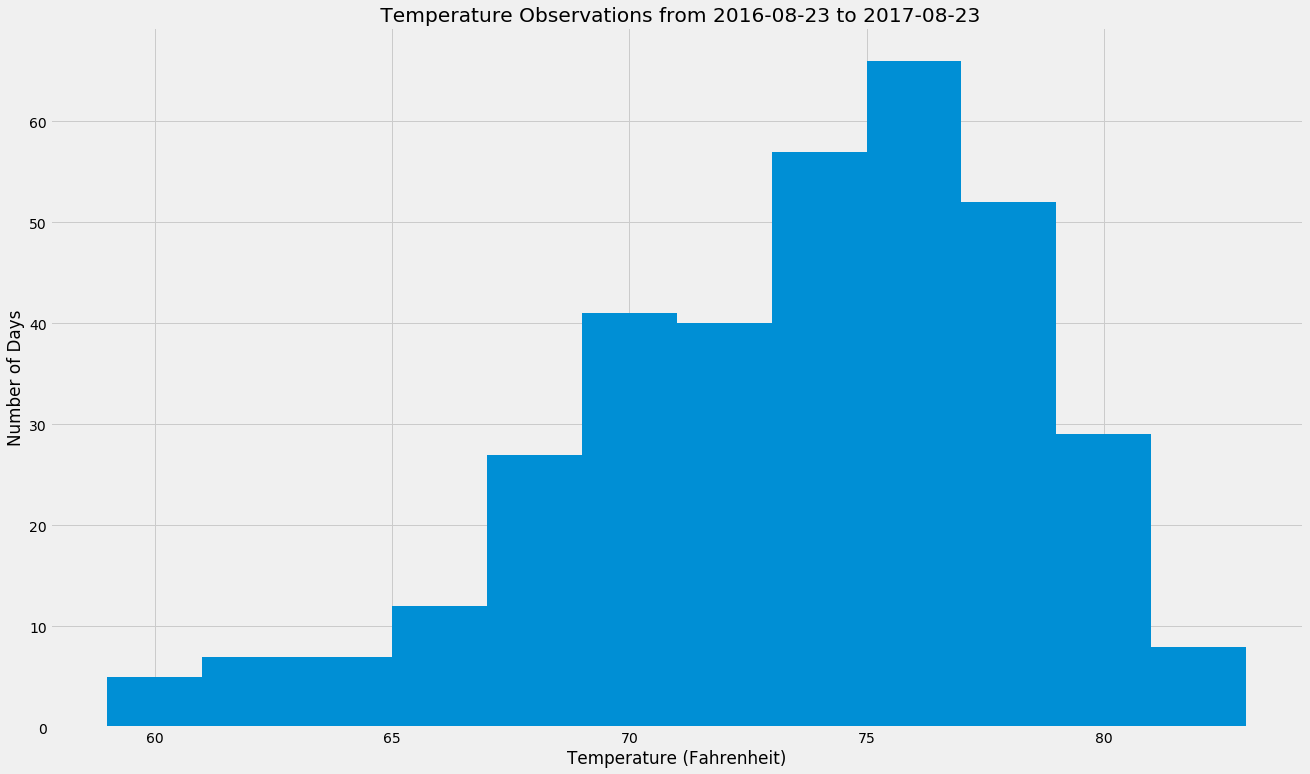

In [94]:
x_axis = year_temps['tobs']
plt.figure(figsize=(20,12))
plt.hist(x_axis,bins=12)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Number of Days')
plt.title(f' Temperature Observations from {start_date} to {end_date}')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
